In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/heart_2022_no_nans.csv'

In [ ]:
data_update = pd.read_csv(file_path)
data_update

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_update.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
data_update.duplicated().sum()

9

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5294,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
86986,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87371,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
136874,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
174878,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data_copy = data_update.copy()
data_copy = data_update.drop_duplicates()
data_copy

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()
data_copy3 = data_copy.copy()

In [ ]:
numerical_cols = data_copy.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy[numerical_cols]
numerical_data

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07
...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28
246018,0.0,7.0,7.0,1.93,90.72,24.34
246019,0.0,15.0,7.0,1.68,83.91,29.86
246020,2.0,2.0,7.0,1.70,83.01,28.66


In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,0
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,0
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,0
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,0
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes,0
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No,0


In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
numerical_cols1 = data_copy1.select_dtypes(include=['float64','number']).columns
numerical_data1 = data_copy1[numerical_cols]
numerical_data1

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07
...,...,...,...,...,...,...
246017,0.0,0.0,6.0,1.78,102.06,32.28
246018,0.0,7.0,7.0,1.93,90.72,24.34
246019,0.0,15.0,7.0,1.68,83.91,29.86
246020,2.0,2.0,7.0,1.70,83.01,28.66


In [ ]:
categorical_cols = data_copy1.select_dtypes(include=['object','category']).columns

#TabNet


In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols:
    le = LabelEncoder()
    data_copy1[col] = le.fit_transform(data_copy1[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy1.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes

target = "HeartConditionBinary"
features = [col for col in data_copy1.columns if col != target]

X = data_copy1[features].values
y = data_copy1[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [ ]:
# Step 1: Encode categorical features
label_encoders = {}
cat_idxs = []
cat_dims = []

for col in categorical_cols:
    le = LabelEncoder()
    data_copy1[col] = le.fit_transform(data_copy1[col].astype(str))  # Ensure data is string for LabelEncoder
    label_encoders[col] = le
    cat_idxs.append(data_copy1.columns.get_loc(col))  # Store column index
    cat_dims.append(len(le.classes_))  # Store number of unique classes


In [ ]:
# Step 2: Separate features and target
target = "HeartConditionBinary"
features = [col for col in data_copy1.columns if col != target]

X = data_copy1[features].values
y = data_copy1[target].values

# Step 3: Train-Validation-Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (172209, 38) (172209,)
Validation set shape: (36902, 38) (36902,)
Test set shape: (36902, 38) (36902,)


In [ ]:
# Step 4: Confirm data types
print(f"X_train: {type(X_train)}, dtype: {X_train.dtype}")
print(f"X_valid: {type(X_valid)}, dtype: {X_valid.dtype}")
print(f"y_train: {type(y_train)}, dtype: {y_train.dtype}")
print(f"y_valid: {type(y_valid)}, dtype: {y_valid.dtype}")
print(f"X_test: {type(X_test)}, dtype: {X_test.dtype}")
print(f"y_test: {type(y_test)}, dtype: {y_test.dtype}")

X_train: <class 'numpy.ndarray'>, dtype: float64
X_valid: <class 'numpy.ndarray'>, dtype: float64
y_train: <class 'numpy.ndarray'>, dtype: int64
y_valid: <class 'numpy.ndarray'>, dtype: int64
X_test: <class 'numpy.ndarray'>, dtype: float64
y_test: <class 'numpy.ndarray'>, dtype: int64


In [ ]:
print(X_train[:5])

[[ 12.     1.     3.    14.    30.     3.     1.     4.     0.     0.
    1.     0.     0.     1.     1.     1.     0.     0.     1.     1.
    1.     1.     0.     2.     0.     1.     1.     7.     1.78  68.04
   21.52   0.     0.     1.     1.     2.     0.     0.  ]
 [ 40.     1.     4.     0.     0.     3.     1.     7.     3.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     1.     1.     4.     1.8  106.59
   32.78   1.     1.     0.     0.     0.     0.     2.  ]
 [ 21.     1.     3.    30.    30.     3.     0.     4.     1.     1.
    0.     0.     0.     1.     0.     1.     2.     1.     1.     1.
    1.     1.     1.     0.     1.     1.     4.     9.     1.78  86.18
   27.26   0.     0.     1.     1.     0.     0.     0.  ]
 [ 23.     0.     4.     0.     0.     3.     1.     7.     3.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     1.     4

In [ ]:
print(X_test[:5])

[[ 22.     0.     2.     1.    10.     3.     1.     8.     0.     0.
    1.     0.     0.     1.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     1.     4.     5.     1.68  90.72
   32.28   1.     0.     1.     0.     2.     0.     0.  ]
 [  7.     1.     0.     0.     0.     3.     1.     4.     3.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     2.     3.     1.     0.     2.     1.88  90.72
   25.68   0.     0.     0.     0.     0.     1.     2.  ]
 [ 26.     0.     4.     0.     0.     3.     1.     6.     3.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     3.     0.     0.     4.     9.     1.65  58.97
   21.63   0.     0.     1.     1.     0.     0.     0.  ]
 [ 12.     1.     2.    30.    30.     3.     1.     6.     0.     0.
    1.     0.     0.     1.     0.     1.     2.     0.     0.     1.
    1.     1.     1.     2.     3.     1.     2

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[17.,  1.,  1., ...,  1.,  0.,  2.],
       [32.,  0.,  0., ...,  0.,  0.,  0.],
       [17.,  1.,  4., ...,  0.,  1.,  2.],
       ...,
       [24.,  0.,  0., ...,  1.,  0.,  0.],
       [ 3.,  1.,  3., ...,  0.,  0.,  0.],
       [53.,  1.,  0., ...,  0.,  0.,  2.]])

In [ ]:
cat_idxs

[0,
 1,
 2,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 37]

In [ ]:
cat_dims

[54,
 2,
 5,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 2,
 5,
 13,
 2,
 2,
 2,
 2,
 4,
 2,
 3]

In [ ]:
# Initialize variables to track the best validation AUC and training accuracy
best_valid_auc = 0
best_train_auc = 0
best_model_params = None  # To store best model weights

In [ ]:
# TabNet parameters
tabnet_params = {
    "cat_idxs": cat_idxs,
    "cat_dims": cat_dims,
    "cat_emb_dim": 2,  # Embedding dimension for categorical features
    "optimizer_fn": torch.optim.Adam,
    "optimizer_params": dict(lr=2e-2),
    "scheduler_params": {"step_size": 50, "gamma": 0.9},
    "scheduler_fn": torch.optim.lr_scheduler.StepLR,
    "mask_type": "entmax",  # Use 'entmax' for sparse attention
    "device_name": "cuda" if torch.cuda.is_available() else "cpu",
}

# Initialize TabNet Classifier
clf = TabNetClassifier(**tabnet_params)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


# no csl


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Initialize an empty list to store results
results = []

# Train the model without class weights (using the original training set)
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for 100 epochs
    patience=15,  # Allow early stopping after 15 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Generate predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score for both classes (0 and 1)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Store the results
results.append({
    'Test Accuracy': test_accuracy,
    'Train Accuracy': train_accuracy,
    'Precision (Class 0)': precision_class_0,
    'Recall (Class 0)': recall_class_0,
    'F1 Score (Class 0)': f1_class_0,
    'Precision (Class 1)': precision_class_1,
    'Recall (Class 1)': recall_class_1,
    'F1 Score (Class 1)': f1_class_1,
    'AUC-ROC Score': auc_score
})

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.29026 | train_auc: 0.76917 | valid_auc: 0.77149 |  0:00:08s
epoch 1  | loss: 0.24987 | train_auc: 0.81402 | valid_auc: 0.80643 |  0:00:15s
epoch 2  | loss: 0.24048 | train_auc: 0.83188 | valid_auc: 0.81901 |  0:00:26s
epoch 3  | loss: 0.23765 | train_auc: 0.83682 | valid_auc: 0.82514 |  0:00:35s
epoch 4  | loss: 0.23288 | train_auc: 0.84448 | valid_auc: 0.83109 |  0:00:42s
epoch 5  | loss: 0.23064 | train_auc: 0.84956 | valid_auc: 0.8336  |  0:00:50s
epoch 6  | loss: 0.22891 | train_auc: 0.85184 | valid_auc: 0.83743 |  0:01:01s
epoch 7  | loss: 0.22905 | train_auc: 0.85013 | valid_auc: 0.83426 |  0:01:13s
epoch 8  | loss: 0.2275  | train_auc: 0.8521  | valid_auc: 0.83726 |  0:01:23s
epoch 9  | loss: 0.22576 | train_auc: 0.85655 | valid_auc: 0.83898 |  0:01:38s
epoch 10 | loss: 0.22594 | train_auc: 0.85745 | valid_auc: 0.8385  |  0:01:46s
epoch 11 | loss: 0.22496 | train_auc: 0.85798 | valid_auc: 0.83793 |  0:01:54s
epoch 12 | loss: 0.22444 | train_auc: 0.85932 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


   Test Accuracy  Train Accuracy  Precision (Class 0)  Recall (Class 0)  \
0       0.918267           0.914             0.919461           0.99818   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.957205             0.715909          0.049842   

   F1 Score (Class 1)  AUC-ROC Score  
0            0.093195       0.840073  


#csl

In [ ]:
'''array([[ 1.        , 10.44310716],
       [ 0.09575694,  1.        ]])

    array([[ 1.        , 10.74743025],
       [ 0.0930455 ,  1.        ]])     10k

       array([[ 1.        , 10.404134  ],
       [ 0.09611564,  1.        ]])    20k


       array([[ 1.        , 10.61440186],
       [ 0.09421162,  1.        ]])  50k








       '''

'array([[ 1.        , 10.44310716],\n       [ 0.09575694,  1.        ]])'

In [ ]:
10.61440186 /(10.61440186+  0.09421162)

0.9912022578669074

In [ ]:
  0.09421162/(10.61440186+ 0.09421162)


0.00879774213309266

In [ ]:
'''array([[0.69314718, 2.43738755],
       [0.0914454 , 0.69314718]])   original

array([[0.69314718, 2.46363451],
       [0.08896784, 0.69314718]]) 10k

       array([[0.69314718, 2.43397592],
       [0.09177269, 0.69314718]])   20k

       array([[0.69314718, 2.45224587],
       [0.09003412, 0.69314718]])  50k





       '''

'array([[0.69314718, 2.43738755],\n       [0.0914454 , 0.69314718]])'

In [ ]:
2.45224587 / (2.45224587+0.09003412)

0.9645852855097995

In [ ]:
0.09003412 / (2.45224587+0.09003412)

0.03541471449020058

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

weights_list = [
    {0: 1, 1: 10.48},  # IR
    {0: (1/10.48), 1: 1},      # WCUSTOM WITH IR
    {0:0.00896487902392998, 1:0.9910351209760699},      # ICF
    {0:0.03584837416030507, 1:0.9641516258396949}      # LICF
]

# Initialize an empty list to store results
results = []

# Loop through all the weights and train the model for each
for weights in weights_list:
    # Train the model with current weights
    clf.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        eval_name=["train", "valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Train for 100 epochs
        patience=15,  # Allow early stopping after 10 epochs without improvement
        batch_size=512,
        virtual_batch_size=128,
        weights=weights,  # Use the current weight set
        num_workers=0,
        drop_last=False,
    )

    # Generate predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]

    # Test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1 score for both classes (0 and 1)
    precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_class_0 = f1_score(y_test, y_pred, pos_label=0)

    precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

    # AUC-ROC score
    auc_score = roc_auc_score(y_test, y_prob)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Store the results
    results.append({
        'Weight Set': str(weights),
        'Test Accuracy': test_accuracy,
        'Train Accuracy': train_accuracy,
        'Precision (Class 0)': precision_class_0,
        'Recall (Class 0)': recall_class_0,
        'F1 Score (Class 0)': f1_class_0,
        'Precision (Class 1)': precision_class_1,
        'Recall (Class 1)': recall_class_1,
        'F1 Score (Class 1)': f1_class_1,
        'AUC-ROC Score': auc_score
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

epoch 0  | loss: 0.56827 | train_auc: 0.81847 | valid_auc: 0.81112 |  0:00:08s
epoch 1  | loss: 0.50982 | train_auc: 0.83916 | valid_auc: 0.82431 |  0:00:15s
epoch 2  | loss: 0.48038 | train_auc: 0.85135 | valid_auc: 0.83454 |  0:00:23s
epoch 3  | loss: 0.477   | train_auc: 0.85496 | valid_auc: 0.83552 |  0:00:31s
epoch 4  | loss: 0.471   | train_auc: 0.85962 | valid_auc: 0.82925 |  0:00:38s
epoch 5  | loss: 0.45984 | train_auc: 0.8636  | valid_auc: 0.83053 |  0:00:47s
epoch 6  | loss: 0.45599 | train_auc: 0.86584 | valid_auc: 0.82658 |  0:00:54s
epoch 7  | loss: 0.45103 | train_auc: 0.86974 | valid_auc: 0.82868 |  0:01:03s
epoch 8  | loss: 0.44461 | train_auc: 0.86927 | valid_auc: 0.82762 |  0:01:11s
epoch 9  | loss: 0.44114 | train_auc: 0.87227 | valid_auc: 0.82065 |  0:01:19s
epoch 10 | loss: 0.43604 | train_auc: 0.87531 | valid_auc: 0.81525 |  0:01:27s
epoch 11 | loss: 0.43388 | train_auc: 0.87447 | valid_auc: 0.82151 |  0:01:34s
epoch 12 | loss: 0.42833 | train_auc: 0.87789 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.56827 | train_auc: 0.81847 | valid_auc: 0.81112 |  0:00:08s
epoch 1  | loss: 0.50982 | train_auc: 0.83916 | valid_auc: 0.82431 |  0:00:16s
epoch 2  | loss: 0.48038 | train_auc: 0.85135 | valid_auc: 0.83454 |  0:00:23s
epoch 3  | loss: 0.477   | train_auc: 0.85496 | valid_auc: 0.83552 |  0:00:31s
epoch 4  | loss: 0.471   | train_auc: 0.85962 | valid_auc: 0.82925 |  0:00:39s
epoch 5  | loss: 0.45984 | train_auc: 0.8636  | valid_auc: 0.83053 |  0:00:46s
epoch 6  | loss: 0.45599 | train_auc: 0.86584 | valid_auc: 0.82658 |  0:00:54s
epoch 7  | loss: 0.45103 | train_auc: 0.86974 | valid_auc: 0.82868 |  0:01:02s
epoch 8  | loss: 0.44461 | train_auc: 0.86927 | valid_auc: 0.82762 |  0:01:10s
epoch 9  | loss: 0.44114 | train_auc: 0.87227 | valid_auc: 0.82065 |  0:01:18s
epoch 10 | loss: 0.43604 | train_auc: 0.87531 | valid_auc: 0.81525 |  0:01:25s
epoch 11 | loss: 0.43388 | train_auc: 0.87447 | valid_auc: 0.82151 |  0:01:34s
epoch 12 | loss: 0.42833 | train_auc: 0.87789 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.2652  | train_auc: 0.81065 | valid_auc: 0.80322 |  0:00:07s
epoch 1  | loss: 0.22511 | train_auc: 0.8332  | valid_auc: 0.82092 |  0:00:15s
epoch 2  | loss: 0.21752 | train_auc: 0.84219 | valid_auc: 0.82825 |  0:00:23s
epoch 3  | loss: 0.2159  | train_auc: 0.84483 | valid_auc: 0.82789 |  0:00:31s
epoch 4  | loss: 0.21331 | train_auc: 0.84812 | valid_auc: 0.82806 |  0:00:39s
epoch 5  | loss: 0.2046  | train_auc: 0.85018 | valid_auc: 0.8305  |  0:00:46s
epoch 6  | loss: 0.20624 | train_auc: 0.85187 | valid_auc: 0.82553 |  0:00:54s
epoch 7  | loss: 0.20567 | train_auc: 0.85317 | valid_auc: 0.82512 |  0:01:02s
epoch 8  | loss: 0.19988 | train_auc: 0.8558  | valid_auc: 0.82242 |  0:01:10s
epoch 9  | loss: 0.19403 | train_auc: 0.85585 | valid_auc: 0.81844 |  0:01:18s
epoch 10 | loss: 0.19486 | train_auc: 0.85814 | valid_auc: 0.81919 |  0:01:26s
epoch 11 | loss: 0.19103 | train_auc: 0.85583 | valid_auc: 0.81993 |  0:01:34s
epoch 12 | loss: 0.18794 | train_auc: 0.85836 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.48003 | train_auc: 0.81702 | valid_auc: 0.80938 |  0:00:07s
epoch 1  | loss: 0.42764 | train_auc: 0.84363 | valid_auc: 0.83084 |  0:00:15s
epoch 2  | loss: 0.41765 | train_auc: 0.85199 | valid_auc: 0.83877 |  0:00:23s
epoch 3  | loss: 0.40427 | train_auc: 0.85408 | valid_auc: 0.83807 |  0:00:30s
epoch 4  | loss: 0.40411 | train_auc: 0.85617 | valid_auc: 0.83917 |  0:00:38s
epoch 5  | loss: 0.39839 | train_auc: 0.85855 | valid_auc: 0.83559 |  0:00:46s
epoch 6  | loss: 0.39507 | train_auc: 0.8613  | valid_auc: 0.8321  |  0:00:53s
epoch 7  | loss: 0.39331 | train_auc: 0.86063 | valid_auc: 0.83316 |  0:01:01s
epoch 8  | loss: 0.39362 | train_auc: 0.86435 | valid_auc: 0.831   |  0:01:09s
epoch 9  | loss: 0.38502 | train_auc: 0.86828 | valid_auc: 0.83314 |  0:01:17s
epoch 10 | loss: 0.38048 | train_auc: 0.86822 | valid_auc: 0.82729 |  0:01:24s
epoch 11 | loss: 0.37056 | train_auc: 0.86911 | valid_auc: 0.82534 |  0:01:32s
epoch 12 | loss: 0.36839 | train_auc: 0.87262 | vali

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


                                        Weight Set  Test Accuracy  \
0                                 {0: 1, 1: 10.48}       0.738133   
1                   {0: 0.09541984732824427, 1: 1}       0.738133   
2  {0: 0.00896487902392998, 1: 0.9910351209760699}       0.342867   
3  {0: 0.03584837416030507, 1: 0.9641516258396949}       0.619267   

   Train Accuracy  Precision (Class 0)  Recall (Class 0)  F1 Score (Class 0)  \
0        0.748186             0.974550          0.733183            0.836809   
1        0.748186             0.974550          0.733183            0.836809   
2        0.346071             0.994392          0.283998            0.441814   
3        0.627457             0.985246          0.593113            0.740468   

   Precision (Class 1)  Recall (Class 1)  F1 Score (Class 1)  AUC-ROC Score  
0             0.214531          0.791930            0.337605       0.835555  
1             0.214531          0.791930            0.337605       0.835555  
2             0.112

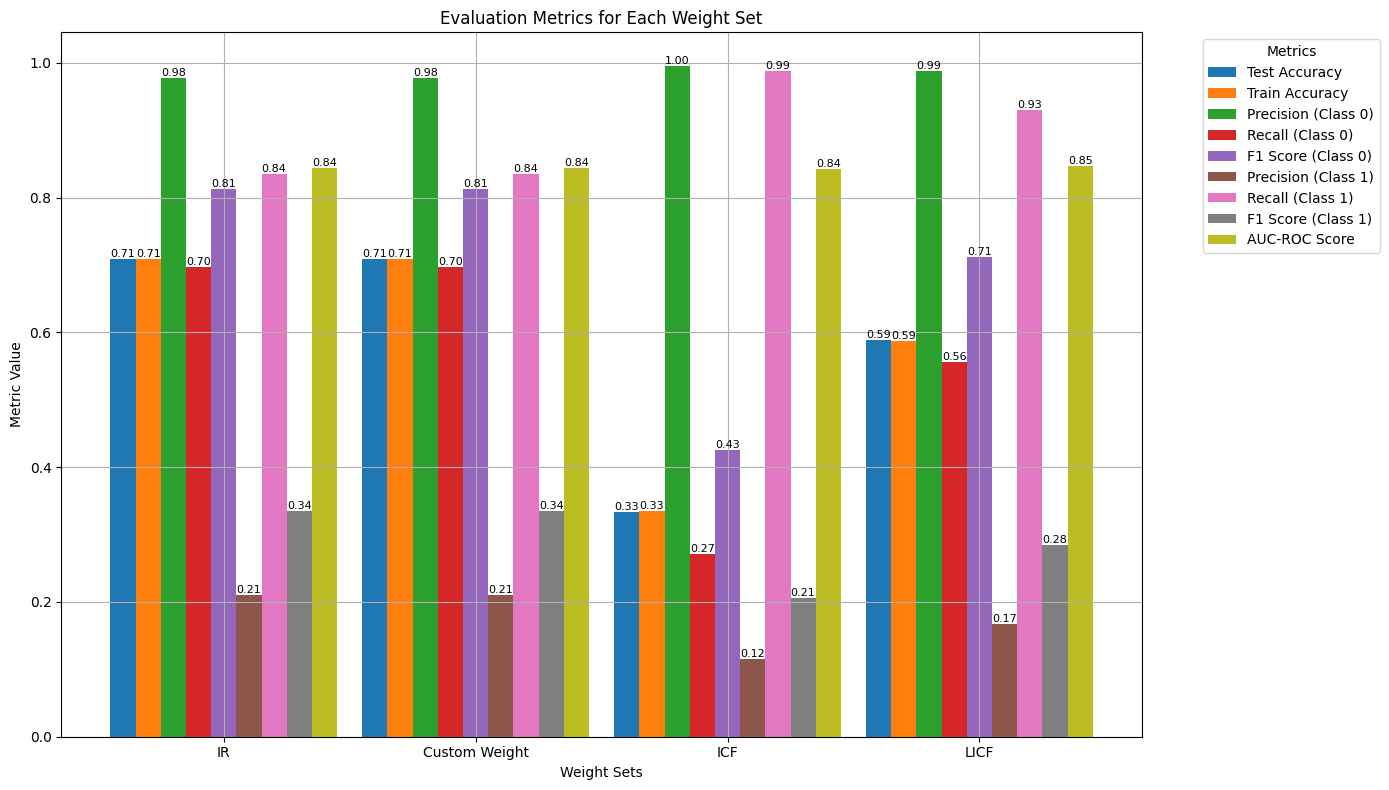

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from the table provided
data = {
    'Weight Set': [
        'IR',
        'Custom Weight',
        'ICF',
        'LICF'
    ],
    'Test Accuracy': [0.708878, 0.708878, 0.333803, 0.588749],
    'Train Accuracy': [0.708563, 0.708563, 0.334663, 0.587757],
    'Precision (Class 0)': [0.977777, 0.977777, 0.995632, 0.988169],
    'Recall (Class 0)': [0.696682, 0.696682, 0.270848, 0.555806],
    'F1 Score (Class 0)': [0.813635, 0.813635, 0.425849, 0.711450],
    'Precision (Class 1)': [0.209630, 0.209630, 0.115372, 0.167900],
    'Recall (Class 1)': [0.835545, 0.835545, 0.987658, 0.930886],
    'F1 Score (Class 1)': [0.335169, 0.335169, 0.206609, 0.284488],
    'AUC-ROC Score': [0.844198, 0.844198, 0.842646, 0.846716]
}

# Create a DataFrame from the provided data
df = pd.DataFrame(data)

# Prepare the data for plotting
metrics = [
    'Test Accuracy', 'Train Accuracy', 'Precision (Class 0)', 'Recall (Class 0)', 'F1 Score (Class 0)',
    'Precision (Class 1)', 'Recall (Class 1)', 'F1 Score (Class 1)', 'AUC-ROC Score'
]

# Collect the values for each metric
metric_values = [
    df['Test Accuracy'].values,
    df['Train Accuracy'].values,
    df['Precision (Class 0)'].values,
    df['Recall (Class 0)'].values,
    df['F1 Score (Class 0)'].values,
    df['Precision (Class 1)'].values,
    df['Recall (Class 1)'].values,
    df['F1 Score (Class 1)'].values,
    df['AUC-ROC Score'].values
]

# Set x-axis positions for each weight set
x = np.arange(len(df))  # the number of weight sets

# Set the width of each bar for grouping
width = 0.1

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Loop through each metric and plot its values
for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * width, metric_values[i], width, label=metric)

    # Add the respective values on top of the bars in small font
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Set labels and title
ax.set_xlabel('Weight Sets')
ax.set_ylabel('Metric Value')
ax.set_title('Evaluation Metrics for Each Weight Set')

# Adjust x-ticks to match the weight sets
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels(df['Weight Set'].values)

# Move the legend outside the plot
ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid and adjust layout
ax.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
'''# Train the TabNet model for 100 epochs
clf.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=["train", "valid"],
    eval_metric=["auc"],
    max_epochs=500,  # Train for 500 epochs
    patience=75,  # Allow early stopping after 75 epochs without improvement
    batch_size=512,
    virtual_batch_size=128,
    weights={0: 1, 1: 10.38},  # Adjust weights for imbalance
    num_workers=0,
    drop_last=False,
)'''

epoch 0  | loss: 0.52596 | train_auc: 0.84584 | valid_auc: 0.84331 |  0:00:24s
epoch 1  | loss: 0.48312 | train_auc: 0.85039 | valid_auc: 0.8482  |  0:00:44s
epoch 2  | loss: 0.47645 | train_auc: 0.8534  | valid_auc: 0.84697 |  0:01:04s
epoch 3  | loss: 0.47197 | train_auc: 0.85537 | valid_auc: 0.84742 |  0:01:23s
epoch 4  | loss: 0.46934 | train_auc: 0.85794 | valid_auc: 0.84513 |  0:01:44s
epoch 5  | loss: 0.4644  | train_auc: 0.85973 | valid_auc: 0.84386 |  0:02:03s
epoch 6  | loss: 0.46148 | train_auc: 0.86187 | valid_auc: 0.84609 |  0:02:23s
epoch 7  | loss: 0.45986 | train_auc: 0.86324 | valid_auc: 0.84486 |  0:02:42s
epoch 8  | loss: 0.45586 | train_auc: 0.86431 | valid_auc: 0.84109 |  0:03:01s
epoch 9  | loss: 0.45426 | train_auc: 0.86539 | valid_auc: 0.84305 |  0:03:22s
epoch 10 | loss: 0.45095 | train_auc: 0.86628 | valid_auc: 0.84023 |  0:03:42s
epoch 11 | loss: 0.45073 | train_auc: 0.86633 | valid_auc: 0.83921 |  0:04:02s
epoch 12 | loss: 0.4457  | train_auc: 0.86871 | vali

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
'''# PLOT TRAINING AND VALIDATION AUC
plt.figure(figsize=(10, 6))
plt.plot(clf.history["train_auc"], label="Train AUC")
plt.plot(clf.history["valid_auc"], label="Validation AUC")
plt.title("Training vs Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()'''

In [ ]:
'''# Retrieve the best validation and training AUC from history
best_valid_auc = max(clf.history["valid_auc"])
best_train_auc = max(clf.history["train_auc"])

print(f"Best Validation AUC: {best_valid_auc}")
print(f"Best Training AUC: {best_train_auc}")'''

Best Validation AUC: 0.8481957513351479
Best Training AUC: 0.8897700858501878


In [ ]:
'''# Evaluate the model on the test set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]'''

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.70      0.81     33661
           1       0.21      0.84      0.34      3241

    accuracy                           0.71     36902
   macro avg       0.59      0.77      0.57     36902
weighted avg       0.91      0.71      0.77     36902

AUC-ROC Score: 0.8442
Confusion Matrix:
[[23451 10210]
 [  533  2708]]


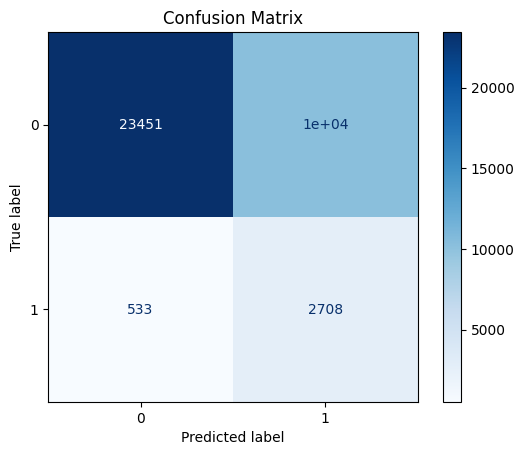

In [ ]:
'''# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()'''

# hyperparameter tuninng

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.5 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    cat_emb_dim = trial.suggest_int("cat_emb_dim", 1, 10)
    lr = trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True)
    gamma = trial.suggest_float("gamma", 0.5, 0.99)
    step_size = trial.suggest_int("step_size", 10, 100)
    mask_type = trial.suggest_categorical("mask_type", ["entmax", "sparsemax"])
    batch_size = trial.suggest_categorical("batch_size", [128, 256, 512])

    # Initialize TabNet with the suggested hyperparameters
    clf1 = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=cat_emb_dim,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        scheduler_params={"step_size": step_size, "gamma": gamma},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        mask_type=mask_type,
        device_name="cuda" if torch.cuda.is_available() else "cpu",
    )

    # Train the model
    clf1.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_valid, y_valid)],
        eval_name=["valid"],
        eval_metric=["auc"],
        max_epochs=100,  # Maximum number of epochs for tuning
        patience=20,  # Early stopping
        batch_size=batch_size,
        virtual_batch_size=128,
        weights={0: (1/10.38), 1: 1},  # Adjust weights for imbalance
        num_workers=0,
        drop_last=False,
    )

    # Evaluate on the validation set
    preds_valid = clf1.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
    valid_auc = roc_auc_score(y_valid, preds_valid)  # Compute AUC

    return valid_auc  # Optuna will maximize this value

In [ ]:
# Create an Optuna study and optimize
study = optuna.create_study(direction="maximize")  # Maximize AUC
study.optimize(objective, n_trials=1)

# Output the best hyperparameters and score
print("Best hyperparameters:", study.best_params)
print("Best validation AUC:", study.best_value)

[I 2025-03-03 12:52:12,406] A new study created in memory with name: no-name-54cab9a8-0686-43bd-8f22-da2ea16fb3ab
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5002  | valid_auc: 0.84255 |  0:00:43s
epoch 1  | loss: 0.48253 | valid_auc: 0.84675 |  0:01:24s
epoch 2  | loss: 0.47963 | valid_auc: 0.84844 |  0:02:07s
epoch 3  | loss: 0.47401 | valid_auc: 0.84957 |  0:02:47s
epoch 4  | loss: 0.47136 | valid_auc: 0.84942 |  0:03:28s
epoch 5  | loss: 0.46337 | valid_auc: 0.8477  |  0:04:08s
epoch 6  | loss: 0.46185 | valid_auc: 0.84497 |  0:04:49s
epoch 7  | loss: 0.46065 | valid_auc: 0.84292 |  0:05:30s
epoch 8  | loss: 0.45463 | valid_auc: 0.84315 |  0:06:11s
epoch 9  | loss: 0.44974 | valid_auc: 0.84387 |  0:06:52s
epoch 10 | loss: 0.44824 | valid_auc: 0.84283 |  0:07:33s
epoch 11 | loss: 0.44496 | valid_auc: 0.8414  |  0:08:13s
epoch 12 | loss: 0.44134 | valid_auc: 0.836   |  0:08:54s
epoch 13 | loss: 0.44016 | valid_auc: 0.84117 |  0:09:35s
epoch 14 | loss: 0.43737 | valid_auc: 0.83781 |  0:10:17s
epoch 15 | loss: 0.4363  | valid_auc: 0.83848 |  0:10:59s
epoch 16 | loss: 0.43622 | valid_auc: 0.83857 |  0:11:40s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-03 13:09:28,986] Trial 0 finished with value: 0.8495663858392267 and parameters: {'cat_emb_dim': 4, 'learning_rate': 0.019500150348539275, 'gamma': 0.8631268034030124, 'step_size': 28, 'mask_type': 'entmax', 'batch_size': 128}. Best is trial 0 with value: 0.8495663858392267.


Best hyperparameters: {'cat_emb_dim': 4, 'learning_rate': 0.019500150348539275, 'gamma': 0.8631268034030124, 'step_size': 28, 'mask_type': 'entmax', 'batch_size': 128}
Best validation AUC: 0.8495663858392267


In [ ]:
best_params = study.best_params

clf_best = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best_params["cat_emb_dim"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params={"lr": best_params["learning_rate"]},
    scheduler_params={"step_size": best_params["step_size"], "gamma": best_params["gamma"]},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type=best_params["mask_type"],
    device_name="cuda" if torch.cuda.is_available() else "cpu",
)

clf_best.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_valid, y_valid), (X_test, y_test)],  # Evaluate on both validation and test sets
    eval_name=["valid", "test"],
    eval_metric=["auc"],
    max_epochs=100,  # Train for more epochs with the best hyperparameters
    patience=20,
    batch_size=best_params["batch_size"],
    virtual_batch_size=128,
    weights={0: (1/10.38), 1: 1},
    num_workers=0,
    drop_last=False,
)

# Evaluate on the test set
preds_test = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, preds_test)
print("Test AUC:", test_auc)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.5002  | valid_auc: 0.84255 | test_auc: 0.83889 |  0:00:43s
epoch 1  | loss: 0.48261 | valid_auc: 0.84705 | test_auc: 0.84464 |  0:01:28s
epoch 2  | loss: 0.47912 | valid_auc: 0.84807 | test_auc: 0.84356 |  0:02:12s
epoch 3  | loss: 0.47804 | valid_auc: 0.84541 | test_auc: 0.84285 |  0:02:57s
epoch 4  | loss: 0.47456 | valid_auc: 0.84909 | test_auc: 0.84493 |  0:03:40s
epoch 5  | loss: 0.46931 | valid_auc: 0.84756 | test_auc: 0.84369 |  0:04:24s
epoch 6  | loss: 0.4656  | valid_auc: 0.84413 | test_auc: 0.84246 |  0:05:08s
epoch 7  | loss: 0.46191 | valid_auc: 0.84135 | test_auc: 0.83767 |  0:05:52s
epoch 8  | loss: 0.45629 | valid_auc: 0.84384 | test_auc: 0.83983 |  0:06:36s
epoch 9  | loss: 0.45134 | valid_auc: 0.84298 | test_auc: 0.83847 |  0:07:20s
epoch 10 | loss: 0.45005 | valid_auc: 0.84148 | test_auc: 0.83757 |  0:08:04s
epoch 11 | loss: 0.44871 | valid_auc: 0.84098 | test_auc: 0.83749 |  0:08:49s
epoch 12 | loss: 0.44358 | valid_auc: 0.83702 | test_auc: 0.8352

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test AUC: 0.8449266389576211


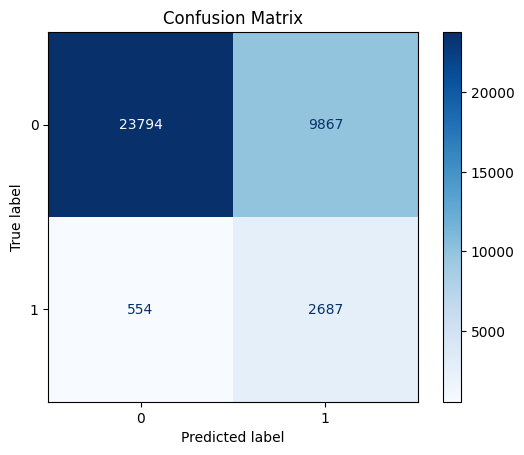

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     33661
           1       0.21      0.83      0.34      3241

    accuracy                           0.72     36902
   macro avg       0.60      0.77      0.58     36902
weighted avg       0.91      0.72      0.78     36902

Test AUC: 0.8449


In [ ]:
# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
'''# GLOBAL FEATURE IMPORTANCE
global_importance = clf_best.feature_importances_
print("Global Feature Importance:")
for idx, importance in enumerate(global_importance):
    print(f"Feature {features[idx]}: {importance:.4f}")'''


In [ ]:
'''# LOCAL FEATURE IMPORTANCE
explain_matrix, masks = clf_best.explain(X_test)  # Explain on test data
print("Local Feature Importance (Sample View):")
print(explain_matrix[:25])  # Display feature importance for the first 5 samples'''

In [ ]:
'''# PLOT TRAINING AND VALIDATION AUC
plt.figure(figsize=(10, 6))
plt.plot(clf_best.history["train_auc"], label="Train AUC")
plt.plot(clf_best.history["valid_auc"], label="Validation AUC")
plt.title("Training vs Validation AUC")
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()'''

In [ ]:
'''# Predictions
y_pred = clf_best.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# TEST AUC SCORE
from sklearn.metrics import roc_auc_score
y_prob = clf_best.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_prob)
print(f"Test AUC: {test_auc:.4f}")'''

#MLP

In [ ]:
data_copy2['HeartConditionBinary'] = ((data_copy2['HadHeartAttack'] == 'Yes') | (data_copy2['HadAngina'] == 'Yes')).astype('int')
data_copy2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartConditionBinary
0,Texas,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,113.40,40.35,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,0
1,Wisconsin,Female,Good,2.0,5.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,...,104.33,34.97,Yes,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No,0
2,Idaho,Male,Poor,7.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,...,104.33,34.97,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
3,Iowa,Female,Good,20.0,10.0,Within past year (anytime less than 12 months ...,No,8.0,All,Yes,...,127.01,45.19,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1
4,South Dakota,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,49.90,19.49,Yes,No,Yes,No,"Yes, received Tdap",No,Tested positive using home test without a heal...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Utah,Male,Very good,3.0,0.0,5 or more years ago,Yes,7.0,None of them,No,...,77.11,26.63,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No,0
99996,New Mexico,Male,Very good,30.0,10.0,Within past year (anytime less than 12 months ...,Yes,6.0,All,Yes,...,90.72,25.68,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
99997,Michigan,Female,Very good,2.0,12.0,5 or more years ago,No,7.0,None of them,No,...,56.70,20.80,Yes,Yes,Yes,Yes,"Yes, received Tdap",Yes,No,0
99998,Arizona,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,106.59,29.37,No,No,Yes,No,"Yes, received tetanus shot, but not Tdap",No,No,0


In [ ]:
data_copy2 = data_copy2.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

In [ ]:
data_copy2['Sex'] = data_copy2['Sex'].replace({'Male':1,'Female':0})
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

nominal_encoded2 = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy2[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy2.index  # Align indices with the original DataFrame
)

binary_encoded2 = data_copy2[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded2 = data_copy2[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-164-397d4df64648>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy2['Sex'] = data_copy2['Sex'].replace({'Male':1,'Female':0})
<ipython-input-164-397d4df64648>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded2 = data_copy2[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-164-397d4df64648>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [ ]:
data_copy2['HeartConditionBinary'] = data_copy2['HeartConditionBinary'].astype('category')
data_copy2['Sex'] = data_copy2['Sex'].astype('category')

In [ ]:
numerical_cols2 = data_copy2.select_dtypes(include=['float64','number']).columns
numerical_data2 = data_copy2[numerical_cols]
numerical_data2

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,0.0,0.0,8.0,1.68,113.40,40.35
1,2.0,5.0,8.0,1.73,104.33,34.97
2,7.0,10.0,6.0,1.73,104.33,34.97
3,20.0,10.0,8.0,1.68,127.01,45.19
4,0.0,0.0,7.0,1.60,49.90,19.49
...,...,...,...,...,...,...
99995,3.0,0.0,7.0,1.70,77.11,26.63
99996,30.0,10.0,6.0,1.88,90.72,25.68
99997,2.0,12.0,7.0,1.65,56.70,20.80
99998,0.0,0.0,7.0,1.91,106.59,29.37


In [ ]:
numerical_cols2

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

In [ ]:
processed_data2 = pd.concat([nominal_encoded2, binary_encoded2, ordinal_encoded2,numerical_data2], axis=1)
processed_data2['HeartConditionBinary'] = data_copy2['HeartConditionBinary'].values

In [ ]:
processed_data2

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,HeartConditionBinary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,6,0.0,0.0,8.0,1.68,113.40,40.35,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,9,2.0,5.0,8.0,1.73,104.33,34.97,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,7.0,10.0,6.0,1.73,104.33,34.97,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,3,8,20.0,10.0,8.0,1.68,127.01,45.19,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,3,8,0.0,0.0,7.0,1.60,49.90,19.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,5,3.0,0.0,7.0,1.70,77.11,26.63,0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,11,30.0,10.0,6.0,1.88,90.72,25.68,1
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,0,0,2.0,12.0,7.0,1.65,56.70,20.80,0
99998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,3,7,0.0,0.0,7.0,1.91,106.59,29.37,0


In [ ]:
X2 = processed_data2.drop(columns=['HeartConditionBinary'])
y2 = processed_data2['HeartConditionBinary']

# Split into train, validation, and test sets (70% train, 15% validation, 15% test)
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=10)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=10)

In [ ]:
scaler = StandardScaler()

X2_train[numerical_cols2] = scaler.fit_transform(X2_train[numerical_cols2])
X2_valid[numerical_cols2] = scaler.transform(X2_valid[numerical_cols2])
X2_test[numerical_cols2] = scaler.transform(X2_test[numerical_cols2])

In [ ]:
X2_test

,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,...,ChestScan,GeneralHealth,LastCheckupTime,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
76966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,5,-0.372712,0.716245,0.671594,-0.235598,0.329803,0.548949
5572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,4,3,2,-0.491310,-0.515747,-2.086856,1.647633,0.329803,-0.457829
83102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,3,9,-0.491310,-0.515747,-0.707631,-0.518082,-1.150533,-1.075624
36806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,3,4,3.066610,3.180231,-0.707631,0.706018,1.789159,1.513015
74454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,3,7,1.880637,0.100249,-0.707631,-1.930505,-1.319781,-0.616473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,9,-0.491310,-0.515747,1.361206,-0.235598,-0.621808,-0.558507
73829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,3,3,12,-0.491310,-0.515747,1.361206,0.235210,-0.177940,-0.293083
45556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,4,3,12,-0.491310,-0.392548,-1.397244,-0.518082,-0.474008,-0.262575
95860,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,4,3,5,-0.491310,-0.515747,0.671594,0.235210,-0.304760,-0.431897


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
X2_train_tensor = torch.tensor(X2_train.values, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train.values, dtype=torch.float32).view(-1, 1)

X2_valid_tensor = torch.tensor(X2_valid.values, dtype=torch.float32)
y2_valid_tensor = torch.tensor(y2_valid.values, dtype=torch.float32).view(-1, 1)

X2_test_tensor = torch.tensor(X2_test.values, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test.values, dtype=torch.float32).view(-1, 1)

# Check the shapes of the splits
print(f"Training Data: {X2_train_tensor.shape}, Validation Data: {X2_valid_tensor.shape}, Test Data: {X2_test_tensor.shape}")

Training Data: torch.Size([70000, 111]), Validation Data: torch.Size([15000, 111]), Test Data: torch.Size([15000, 111])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#NO CSL


Epoch [5/20], Loss: 0.1590, Training Accuracy: 0.9152
Epoch [10/20], Loss: 0.1378, Training Accuracy: 0.9174
Epoch [15/20], Loss: 0.1399, Training Accuracy: 0.9203
Epoch [20/20], Loss: 0.1072, Training Accuracy: 0.9239
Test Accuracy: 0.9137
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95     13736
     Class 1       0.46      0.13      0.20      1264

    accuracy                           0.91     15000
   macro avg       0.69      0.56      0.58     15000
weighted avg       0.89      0.91      0.89     15000

Confusion Matrix:
[[13541   195]
 [ 1099   165]]


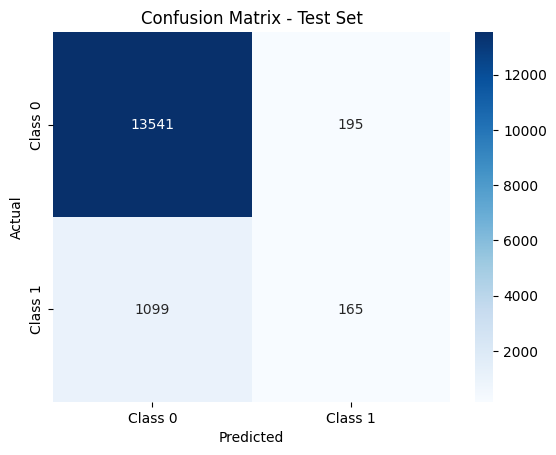

Test AUC ROC: 0.8206


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters
hidden_size1 = 128   # Size of the first hidden layer
hidden_size2 = 64    # Size of the second hidden layer
dropout = 0.2        # Dropout rate

# Define the model using nn.Sequential
def create_model():
    model = nn.Sequential(
        nn.Linear(X2_train_tensor.shape[1], hidden_size1),  # Input layer to first hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size1, hidden_size2),  # First hidden layer to second hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size2, 1),  # Second hidden layer to output layer
        nn.Sigmoid()  # Sigmoid activation for binary classification
    )
    return model

# Define optimizer (Adam)
optimizer = optim.Adam

# Function to train and evaluate the model without any weights
def train_and_evaluate(model, optimizer):
    # Recreate the model and move it to the device
    model = create_model().to(device)

    # Initialize optimizer
    optimizer = optimizer(model.parameters(), lr=0.001)

    # Define number of epochs for training
    epochs = 20
    batch_size = 64

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Initialize variable for training accuracy tracking
        correct_train = 0
        total_train = 0

        # Mini-batch gradient descent
        for i in range(0, X2_train_tensor.shape[0], batch_size):
            # Get mini-batch
            batch_X = X2_train_tensor[i:i+batch_size].to(device)
            batch_y = y2_train_tensor[i:i+batch_size].to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X)

            # Compute loss
            criterion = nn.BCELoss()  # Using BCELoss without weight argument
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track accuracy for training
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions
            correct_train += (predicted == batch_y).sum().item()
            total_train += batch_y.size(0)

        # Calculate and print training accuracy
        train_accuracy = correct_train / total_train
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y2_test_pred_prob = model(X2_test_tensor.to(device)).cpu().numpy()  # Get the predicted probabilities
        y2_test_pred_bin = (y2_test_pred_prob > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y2_test_tensor.numpy(), y2_test_pred_bin.flatten())
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Print classification report for test set (Precision, Recall, F1 Score for both classes)
    print("Test Classification Report:")
    print(classification_report(y2_test_tensor.numpy(), y2_test_pred_bin.flatten(), target_names=["Class 0", "Class 1"]))

    # Confusion matrix for test set
    cm = confusion_matrix(y2_test_tensor.numpy(), y2_test_pred_bin.flatten())
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

    # Calculate and print AUC ROC score
    auc_roc = roc_auc_score(y2_test_tensor.numpy(), y2_test_pred_prob.flatten())  # Using probabilities
    print(f"Test AUC ROC: {auc_roc:.4f}")

# Train and evaluate the model without weights
train_and_evaluate(create_model(), optimizer)


#CSL



Training and Evaluating with Weight Set: {0: 1, 1: 10.48}
Epoch [5/20], Loss: 0.1480, Training Accuracy: 0.9151
Epoch [10/20], Loss: 0.1389, Training Accuracy: 0.9178
Epoch [15/20], Loss: 0.1119, Training Accuracy: 0.9217
Epoch [20/20], Loss: 0.1253, Training Accuracy: 0.9243
Test Accuracy for Weight Set {0: 1, 1: 10.48}: 0.9146
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95     13736
     Class 1       0.47      0.11      0.18      1264

    accuracy                           0.91     15000
   macro avg       0.70      0.55      0.57     15000
weighted avg       0.89      0.91      0.89     15000

Confusion Matrix:
[[13580   156]
 [ 1125   139]]


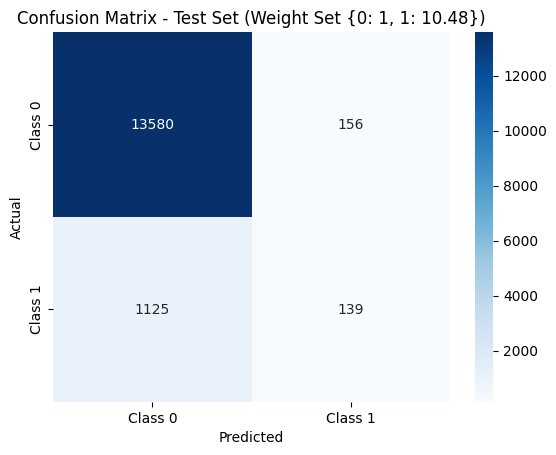

Test AUC ROC for Weight Set {0: 1, 1: 10.48}: 0.8068

Training and Evaluating with Weight Set: {0: 0.09541984732824427, 1: 1}
Epoch [5/20], Loss: 0.1476, Training Accuracy: 0.9157
Epoch [10/20], Loss: 0.1374, Training Accuracy: 0.9177
Epoch [15/20], Loss: 0.1255, Training Accuracy: 0.9210
Epoch [20/20], Loss: 0.1289, Training Accuracy: 0.9243
Test Accuracy for Weight Set {0: 0.09541984732824427, 1: 1}: 0.9151
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96     13736
     Class 1       0.48      0.11      0.18      1264

    accuracy                           0.92     15000
   macro avg       0.70      0.55      0.57     15000
weighted avg       0.89      0.92      0.89     15000

Confusion Matrix:
[[13590   146]
 [ 1128   136]]


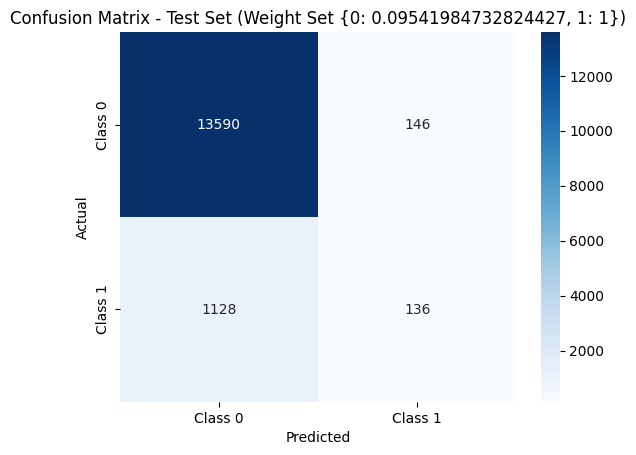

Test AUC ROC for Weight Set {0: 0.09541984732824427, 1: 1}: 0.8154

Training and Evaluating with Weight Set: {0: 0.00896487902392998, 1: 0.9910351209760699}
Epoch [5/20], Loss: 0.1664, Training Accuracy: 0.9157
Epoch [10/20], Loss: 0.1252, Training Accuracy: 0.9178
Epoch [15/20], Loss: 0.1581, Training Accuracy: 0.9210
Epoch [20/20], Loss: 0.1548, Training Accuracy: 0.9252
Test Accuracy for Weight Set {0: 0.00896487902392998, 1: 0.9910351209760699}: 0.9152
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.96     13736
     Class 1       0.48      0.09      0.16      1264

    accuracy                           0.92     15000
   macro avg       0.70      0.54      0.56     15000
weighted avg       0.89      0.92      0.89     15000

Confusion Matrix:
[[13608   128]
 [ 1144   120]]


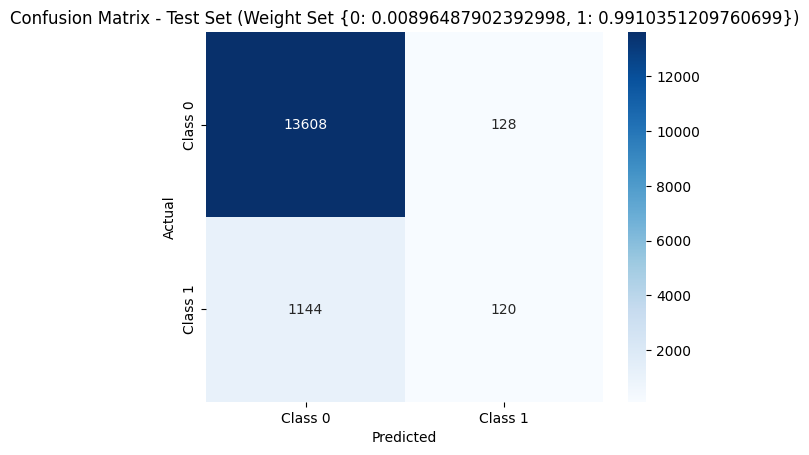

Test AUC ROC for Weight Set {0: 0.00896487902392998, 1: 0.9910351209760699}: 0.8140

Training and Evaluating with Weight Set: {0: 0.03584837416030507, 1: 0.9641516258396949}
Epoch [5/20], Loss: 0.1478, Training Accuracy: 0.9153
Epoch [10/20], Loss: 0.1275, Training Accuracy: 0.9173
Epoch [15/20], Loss: 0.1200, Training Accuracy: 0.9212
Epoch [20/20], Loss: 0.1017, Training Accuracy: 0.9244
Test Accuracy for Weight Set {0: 0.03584837416030507, 1: 0.9641516258396949}: 0.9145
Test Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.99      0.95     13736
     Class 1       0.47      0.11      0.18      1264

    accuracy                           0.91     15000
   macro avg       0.70      0.55      0.57     15000
weighted avg       0.89      0.91      0.89     15000

Confusion Matrix:
[[13573   163]
 [ 1120   144]]


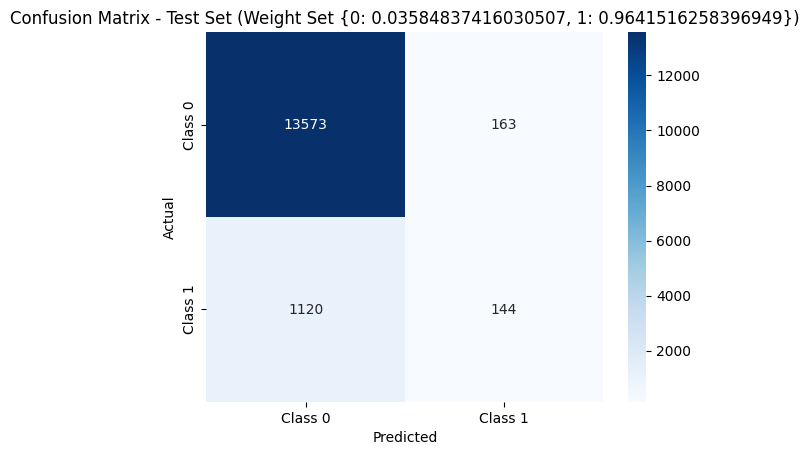

Test AUC ROC for Weight Set {0: 0.03584837416030507, 1: 0.9641516258396949}: 0.8132


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define hyperparameters
hidden_size1 = 128   # Size of the first hidden layer
hidden_size2 = 64    # Size of the second hidden layer
dropout = 0.2        # Dropout rate

# Define the model using nn.Sequential
def create_model():
    model = nn.Sequential(
        nn.Linear(X2_train_tensor.shape[1], hidden_size1),  # Input layer to first hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size1, hidden_size2),  # First hidden layer to second hidden layer
        nn.ReLU(),  # ReLU activation
        nn.Dropout(dropout),  # Dropout layer to prevent overfitting
        nn.Linear(hidden_size2, 1),  # Second hidden layer to output layer
        nn.Sigmoid()  # Sigmoid activation for binary classification
    )
    return model

# Define optimizer (Adam)
optimizer = optim.Adam

# Define weights for each class
weights_list = [
    {0: 1, 1: 10.48},  # IR
    {0: (1/10.48), 1: 1},      # WCUSTOM WITH IR
    {0:0.00896487902392998, 1:0.9910351209760699},      # ICF
    {0:0.03584837416030507, 1:0.9641516258396949}      # LICF
]
# Function to train and evaluate the model with each weight set
def train_and_evaluate(weight_set, model, optimizer):
    # Recreate the model and move it to the device
    model = create_model().to(device)

    # Initialize optimizer for each weight set
    optimizer = optimizer(model.parameters(), lr=0.001)

    # Define number of epochs for training
    epochs = 20
    batch_size = 64

    # Training loop
    for epoch in range(epochs):
        model.train()  # Set the model to training mode

        # Initialize variable for training accuracy tracking
        correct_train = 0
        total_train = 0

        # Mini-batch gradient descent
        for i in range(0, X2_train_tensor.shape[0], batch_size):
            # Get mini-batch
            batch_X = X2_train_tensor[i:i+batch_size].to(device)
            batch_y = y2_train_tensor[i:i+batch_size].to(device)

            # Create a weight tensor for the batch: shape should be [batch_size, 1]
            weight_tensor = torch.tensor([weight_set[int(label.item())] for label in batch_y]).float().view(-1, 1).to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(batch_X)

            # Compute weighted loss
            criterion = nn.BCELoss()  # Using BCELoss without weight argument
            loss = criterion(outputs, batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Track accuracy for training
            predicted = (outputs > 0.5).float()  # Apply threshold of 0.5 to get binary predictions
            correct_train += (predicted == batch_y).sum().item()
            total_train += batch_y.size(0)

        # Calculate and print training accuracy
        train_accuracy = correct_train / total_train
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}")

    # Evaluate the model on the test set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y2_test_pred_prob = model(X2_test_tensor.to(device)).cpu().numpy()  # Get the predicted probabilities
        y2_test_pred_bin = (y2_test_pred_prob > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

    # Calculate accuracy on test set
    test_accuracy = accuracy_score(y2_test_tensor.numpy(), y2_test_pred_bin.flatten())
    print(f"Test Accuracy for Weight Set {weight_set}: {test_accuracy:.4f}")

    # Print classification report for test set (Precision, Recall, F1 Score for both classes)
    print("Test Classification Report:")
    print(classification_report(y2_test_tensor.numpy(), y2_test_pred_bin.flatten(), target_names=["Class 0", "Class 1"]))

    # Confusion matrix for test set
    cm = confusion_matrix(y2_test_tensor.numpy(), y2_test_pred_bin.flatten())
    print("Confusion Matrix:")
    print(cm)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - Test Set (Weight Set {weight_set})')
    plt.show()

    # Calculate and print AUC ROC score
    auc_roc = roc_auc_score(y2_test_tensor.numpy(), y2_test_pred_prob.flatten())  # Using probabilities
    print(f"Test AUC ROC for Weight Set {weight_set}: {auc_roc:.4f}")

# Run the model for each weight set
for weight_set in weights_list:
    print(f"\nTraining and Evaluating with Weight Set: {weight_set}")
    train_and_evaluate(weight_set, create_model(), optimizer)


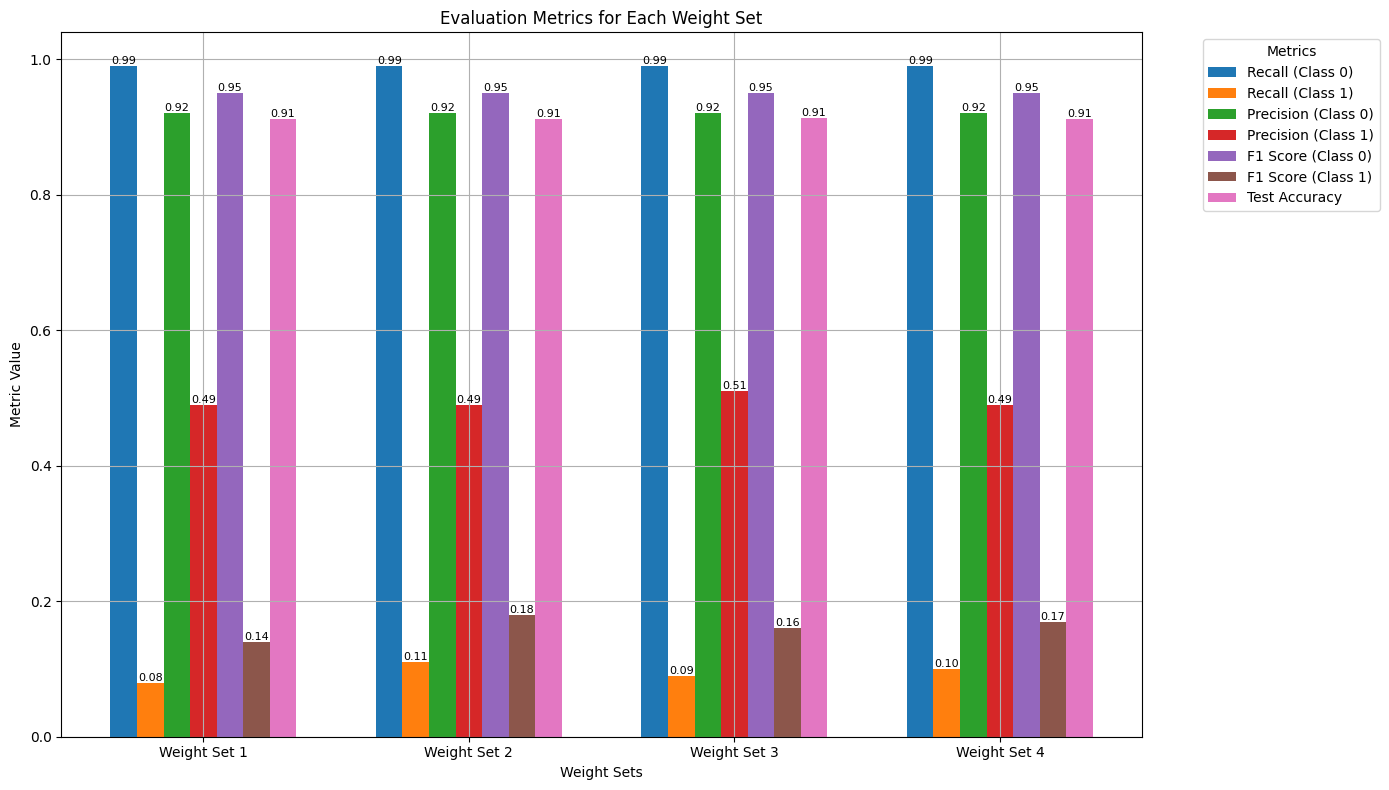

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your previous training and evaluation
results = [
    {
        'Weight Set': "{0: 1, 1: 10.38}",
        'Test Accuracy': 0.9118,
        'Recall (Class 0)': 0.99,
        'Recall (Class 1)': 0.08,
        'Precision (Class 0)': 0.92,
        'Precision (Class 1)': 0.49,
        'F1 Score (Class 0)': 0.95,
        'F1 Score (Class 1)': 0.14
    },
    {
        'Weight Set': "{0: 0.09633911368015413, 1: 1}",
        'Test Accuracy': 0.9119,
        'Recall (Class 0)': 0.99,
        'Recall (Class 1)': 0.11,
        'Precision (Class 0)': 0.92,
        'Precision (Class 1)': 0.49,
        'F1 Score (Class 0)': 0.95,
        'F1 Score (Class 1)': 0.18
    },
    {
        'Weight Set': "{0: 0.009086077881960733, 1: 0.9909139221180393}",
        'Test Accuracy': 0.9125,
        'Recall (Class 0)': 0.99,
        'Recall (Class 1)': 0.09,
        'Precision (Class 0)': 0.92,
        'Precision (Class 1)': 0.51,
        'F1 Score (Class 0)': 0.95,
        'F1 Score (Class 1)': 0.16
    },
    {
        'Weight Set': "{0: 0.036161107438907734, 1: 0.9638388925610922}",
        'Test Accuracy': 0.9117,
        'Recall (Class 0)': 0.99,
        'Recall (Class 1)': 0.10,
        'Precision (Class 0)': 0.92,
        'Precision (Class 1)': 0.49,
        'F1 Score (Class 0)': 0.95,
        'F1 Score (Class 1)': 0.17
    }
]

# Prepare data for plotting
metrics = [
    'Recall (Class 0)', 'Recall (Class 1)', 'Precision (Class 0)', 'Precision (Class 1)',
    'F1 Score (Class 0)', 'F1 Score (Class 1)', 'Test Accuracy'
]

# Collect the values for each metric
metric_values = [
    [result['Recall (Class 0)'], result['Recall (Class 1)'], result['Precision (Class 0)'], result['Precision (Class 1)'],
     result['F1 Score (Class 0)'], result['F1 Score (Class 1)'], result['Test Accuracy']]
    for result in results
]

# Set x-axis positions for each weight set
x = np.arange(len(results))  # the number of weight sets

# Set the width of each bar for grouping
width = 0.1

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Loop through each metric and plot its values
for i, metric in enumerate(metrics):
    bars = ax.bar(x + i * width, [metric_values[j][i] for j in range(len(results))], width, label=metric)

    # Add the respective values on top of the bars in small font
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Set labels and title
ax.set_xlabel('Weight Sets')
ax.set_ylabel('Metric Value')
ax.set_title('Evaluation Metrics for Each Weight Set')

# Adjust x-ticks to match the weight sets
ax.set_xticks(x + width * (len(metrics) - 1) / 2)
ax.set_xticklabels([f'Weight Set {i+1}' for i in range(len(results))])

# Move the legend outside the plot
ax.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid and adjust layout
ax.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# dont run


In [ ]:
def objective(trial):
    # Suggest hyperparameters to tune
    hidden_size1 = trial.suggest_int("hidden_size1", 64, 256)
    hidden_size2 = trial.suggest_int("hidden_size2", 32, 128)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the MLP model
    model = nn.Sequential(
        nn.Linear(X1_train_tensor.shape[1], hidden_size1),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size1, hidden_size2),
        nn.ReLU(),
        nn.Dropout(dropout),
        nn.Linear(hidden_size2, 1),
        nn.Sigmoid()
    )

    # Loss function and optimizer
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCELoss()

    # Training loop for hyperparameter tuning
    for epoch in range(50):
        model.train()
        optimizer.zero_grad()
        output = model(X1_train_tensor)
        loss = criterion(output, y1_train_tensor)
        loss.backward()
        optimizer.step()

    # Evaluate on the validation set
    model.eval()
    with torch.no_grad():
        y_pred_valid = model(X1_valid_tensor).numpy()
        auc = roc_auc_score(y1_valid_tensor.numpy(), y_pred_valid)

    return auc  # Return the AUC score for validation

In [ ]:
# Initialize the Optuna study and maximize AUC
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

# Display best hyperparameters
print("Best Parameters:", study.best_params)
print("Best Validation AUC:", study.best_value)

[I 2025-01-19 20:41:21,255] A new study created in memory with name: no-name-098ee72a-ec54-46bd-bba9-1190e79e4034
[I 2025-01-19 20:43:35,051] Trial 0 finished with value: 0.8348389165147097 and parameters: {'hidden_size1': 240, 'hidden_size2': 86, 'lr': 0.0015372600872132886, 'dropout': 0.16698075890198955, 'weight_decay': 1.1026083445930376e-05}. Best is trial 0 with value: 0.8348389165147097.
[I 2025-01-19 20:45:15,660] Trial 1 finished with value: 0.8196553506014252 and parameters: {'hidden_size1': 227, 'hidden_size2': 87, 'lr': 0.000668309937590089, 'dropout': 0.2635857749279152, 'weight_decay': 7.903718407385593e-06}. Best is trial 0 with value: 0.8348389165147097.
[I 2025-01-19 20:46:21,442] Trial 2 finished with value: 0.8415667267280266 and parameters: {'hidden_size1': 156, 'hidden_size2': 63, 'lr': 0.004295969501603789, 'dropout': 0.4531845336541397, 'weight_decay': 7.075863159449116e-06}. Best is trial 2 with value: 0.8415667267280266.
[I 2025-01-19 20:47:54,628] Trial 3 fini

KeyboardInterrupt: 

In [ ]:
best_params = study.best_params

# Defining the final MLP model with best hyperparameters
final_model = nn.Sequential(
    nn.Linear(X1_train_tensor.shape[1], best_params["hidden_size1"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size1"], best_params["hidden_size2"]),
    nn.ReLU(),
    nn.Dropout(best_params["dropout"]),
    nn.Linear(best_params["hidden_size2"], 1),
    nn.Sigmoid()
)

optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

In [ ]:
# Early stopping and class imbalance handling
patience = 30  # Increased patience
best_valid_auc = 0
epochs_no_improve = 0

# Calculate class weights for imbalance handling
pos_weight = torch.tensor([10.38], dtype=torch.float32)  # Adjust the positive weight based on IR

# Updated loss function with class weights
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Training loop
# Initialize lists to store the accuracies
train_accuracies = []
valid_accuracies = []
test_accuracies = []
train_auc_scores = []
valid_auc_scores = []
test_auc_scores = []

# Training loop with metrics for train, validation, and test sets
for epoch in range(100):
    final_model.train()
    optimizer.zero_grad()
    output_train = final_model(X1_train_tensor).flatten()

    # Compute training loss
    loss = criterion(output_train, y1_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Calculate train accuracy and AUC
    y1_pred_train_binary = (torch.sigmoid(output_train) > 0.5).cpu().numpy().astype(int)
    train_accuracy = accuracy_score(y1_train_tensor.numpy(), y1_pred_train_binary)
    train_auc = roc_auc_score(y1_train_tensor.numpy(), torch.sigmoid(output_train).detach().numpy())

    # Validation
    final_model.eval()
    with torch.no_grad():
        y1_pred_valid_final = final_model(X1_valid_tensor).flatten()
        y1_pred_valid_binary = (torch.sigmoid(y1_pred_valid_final) > 0.5).cpu().numpy().astype(int)
        valid_accuracy = accuracy_score(y1_valid_tensor.numpy(), y1_pred_valid_binary)
        valid_auc = roc_auc_score(y1_valid_tensor.numpy(), torch.sigmoid(y1_pred_valid_final).detach().numpy())

    # Test
    with torch.no_grad():
        y1_pred_test_final = final_model(X1_test_tensor).flatten()
        y1_pred_test_binary = (torch.sigmoid(y1_pred_test_final) > 0.5).cpu().numpy().astype(int)
        test_accuracy = accuracy_score(y1_test_tensor.numpy(), y1_pred_test_binary)
        test_auc = roc_auc_score(y1_test_tensor.numpy(), torch.sigmoid(y1_pred_test_final).detach().numpy())

    # Store metrics for plotting
    train_accuracies.append(train_accuracy)
    valid_accuracies.append(valid_accuracy)
    test_accuracies.append(test_accuracy)
    train_auc_scores.append(train_auc)
    valid_auc_scores.append(valid_auc)
    test_auc_scores.append(test_auc)

    # Early stopping based on validation AUC
    if valid_auc > best_valid_auc:
        best_valid_auc = valid_auc
        epochs_no_improve = 0
        best_model_weights = final_model.state_dict()
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print(f"Early stopping at epoch {epoch} with best validation AUC: {best_valid_auc:.4f}")
            break

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}, Train AUC: {train_auc:.4f}, Valid AUC: {valid_auc:.4f}")



In [ ]:
# Load the best model weights after training
final_model.load_state_dict(best_model_weights)

# Final evaluation on the test set
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"Final Test AUC: {test_auc:.4f}")
print("Final Classification Report (Test Set):\n", classification_report(y1_test_tensor.numpy(), y1_pred_test_binary))
print("Final Confusion Matrix (Test Set):\n", confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary))


In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary)

# Print confusion matrix
print("Final Confusion Matrix (Test Set):")
print(cm)

Final Confusion Matrix (Test Set):
 [[21410 12251]
 [  419  2822]]


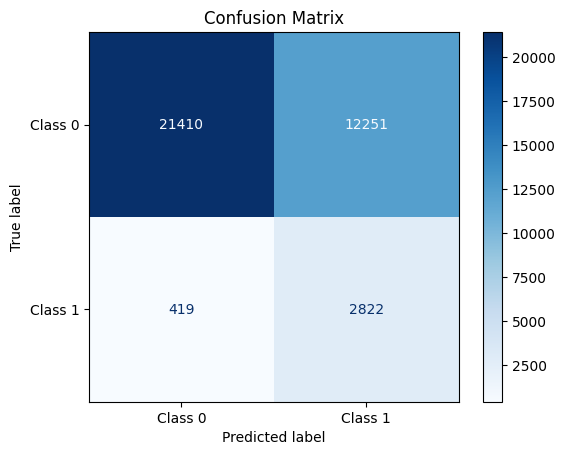

In [ ]:
# Confusion Matrix calculation
cm = confusion_matrix(y1_test_tensor.numpy(), y1_pred_test_binary)

# Display the confusion matrix
print("Final Confusion Matrix (Test Set):\n", cm)

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")

# Title for the plot
plt.title("Confusion Matrix")

# Show the plot
plt.show()

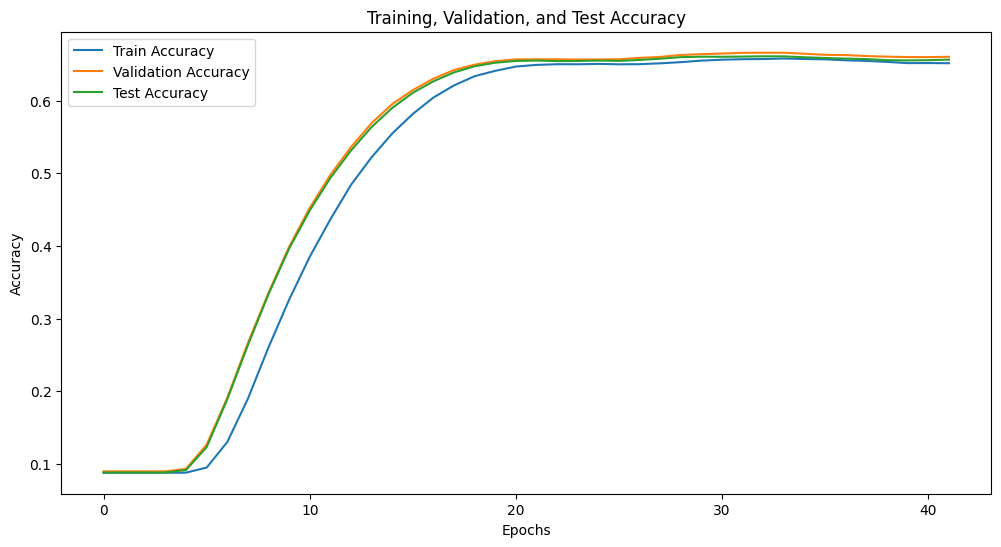

In [ ]:
# Plotting accuracy and AUC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


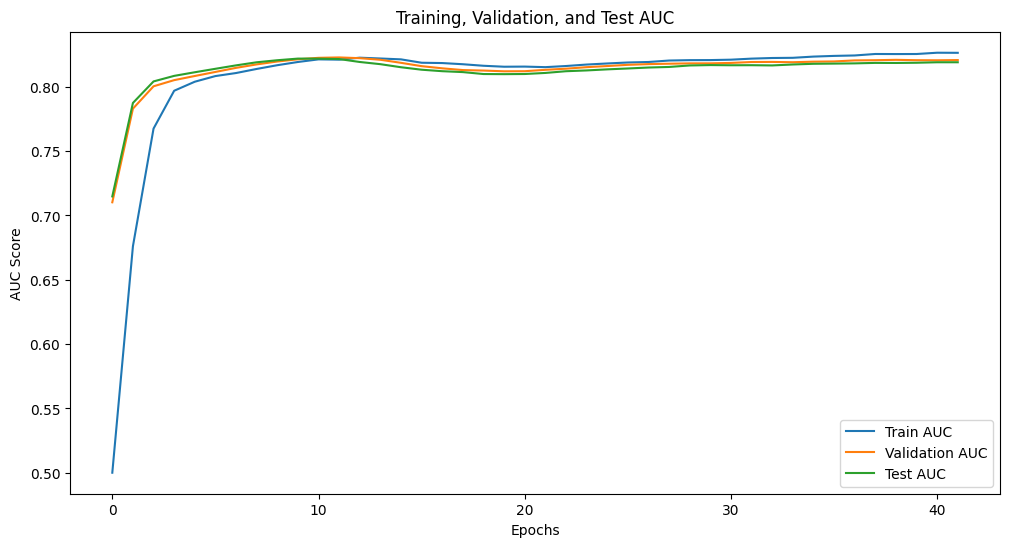

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_auc_scores, label='Train AUC')
plt.plot(valid_auc_scores, label='Validation AUC')
plt.plot(test_auc_scores, label='Test AUC')
plt.title('Training, Validation, and Test AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC Score')
plt.legend()
plt.show()

# Hybrid Approach


# 1) Light Gradient Boosting with Neural Network Embeddings

In [ ]:
!pip install optuna
!pip install pytorch-tabnet

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import optuna
from optuna.trial import TrialState

In [ ]:
'''label_encoders = {}
cat_idxs = []
cat_dims = []

# Ensure data_copy1 contains your dataset
for col in categorical_cols:
    le = LabelEncoder()
    data_copy1[col] = le.fit_transform(data_copy1[col].astype(str))
    label_encoders[col] = le
    cat_idxs.append(data_copy1.columns.get_loc(col))
    cat_dims.append(len(le.classes_))

target = "HeartConditionBinary"
features = [col for col in data_copy1.columns if col != target]

X2 = data_copy1[features].values
y2 = data_copy1[target].values

# Step 3: Train-Validation-Test split
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=10)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=10)

# Standardize numerical data using StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_valid_scaled = scaler.transform(X2_valid)
X2_test_scaled = scaler.transform(X2_test)

# Convert data into PyTorch tensors
X2_train_tensor = torch.tensor(X2_train_scaled, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32).view(-1, 1)

X2_valid_tensor = torch.tensor(X2_valid_scaled, dtype=torch.float32)
y2_valid_tensor = torch.tensor(y2_valid, dtype=torch.float32).view(-1, 1)

X2_test_tensor = torch.tensor(X2_test_scaled, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.float32).view(-1, 1)


def objective(trial):
    # Suggest hyperparameters
    embedding_dim = trial.suggest_int("embedding_dim", 32, 128)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the Neural Network
    class EmbeddingNN(nn.Module):
        def __init__(self, input_dim, embedding_dim):
            super(EmbeddingNN, self).__init__()
            self.fc1 = nn.Linear(input_dim, embedding_dim)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)
            self.fc2 = nn.Linear(embedding_dim, 1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x

    model = EmbeddingNN(X2_train_tensor.shape[1], embedding_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCEWithLogitsLoss()

    # Training loop
    model.train()
    for epoch in range(20):  # Train for 20 epochs
        optimizer.zero_grad()
        outputs = model(X2_train_tensor).flatten()
        loss = criterion(outputs, y2_train_tensor.flatten())
        loss.backward()
        optimizer.step()

    # Validation AUC
    model.eval()
    with torch.no_grad():
        valid_outputs = model(X2_valid_tensor).flatten()
        valid_auc = roc_auc_score(y2_valid_tensor.numpy(), torch.sigmoid(valid_outputs).numpy())

    return valid_auc

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best Hyperparameters:", best_params)

class FinalEmbeddingNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, dropout):
        super(FinalEmbeddingNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, embedding_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(embedding_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

final_nn = FinalEmbeddingNN(
    input_dim=X2_train_tensor.shape[1],
    embedding_dim=best_params["embedding_dim"],
    dropout=best_params["dropout"]
)

optimizer = optim.Adam(final_nn.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCEWithLogitsLoss()

epochs = 50
for epoch in range(epochs):
    final_nn.train()
    optimizer.zero_grad()
    outputs = final_nn(X2_train_tensor).flatten()
    loss = criterion(outputs, y2_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Validation
    final_nn.eval()
    with torch.no_grad():
        valid_outputs = final_nn(X2_valid_tensor).flatten()
        valid_auc = roc_auc_score(y2_valid_tensor.numpy(), torch.sigmoid(valid_outputs).numpy())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Valid AUC: {valid_auc:.4f}")

# Extract embeddings
with torch.no_grad():
    embeddings_train = final_nn.fc1(X2_train_tensor).numpy()
    embeddings_valid = final_nn.fc1(X2_valid_tensor).numpy()
    embeddings_test = final_nn.fc1(X2_test_tensor).numpy()'''


In [ ]:
label_encoders = {}
cat_idxs = []
cat_dims = []

# Ensure data_copy1 contains your dataset
for col in categorical_cols:
    le = LabelEncoder()
    data_copy1[col] = le.fit_transform(data_copy1[col].astype(str))
    label_encoders[col] = le
    cat_idxs.append(data_copy1.columns.get_loc(col))
    cat_dims.append(len(le.classes_))

In [ ]:
target = "HeartConditionBinary"
features = [col for col in data_copy1.columns if col != target]

X2 = data_copy1[features].values
y2 = data_copy1[target].values

# Step 3: Train-Validation-Test split
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=10)
X2_valid, X2_test, y2_valid, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=10)

In [ ]:
# Standardize numerical data using StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_valid_scaled = scaler.transform(X2_valid)
X2_test_scaled = scaler.transform(X2_test)

# Convert data into PyTorch tensors
X2_train_tensor = torch.tensor(X2_train_scaled, dtype=torch.float32)
y2_train_tensor = torch.tensor(y2_train, dtype=torch.float32).view(-1, 1)

X2_valid_tensor = torch.tensor(X2_valid_scaled, dtype=torch.float32)
y2_valid_tensor = torch.tensor(y2_valid, dtype=torch.float32).view(-1, 1)

X2_test_tensor = torch.tensor(X2_test_scaled, dtype=torch.float32)
y2_test_tensor = torch.tensor(y2_test, dtype=torch.float32).view(-1, 1)

In [ ]:
def objective(trial):
    # Suggest hyperparameters
    embedding_dim = trial.suggest_int("embedding_dim", 32, 128)
    dropout = trial.suggest_float("dropout", 0.1, 0.5)
    lr = trial.suggest_float("lr", 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-6, 1e-3, log=True)

    # Define the Neural Network
    class EmbeddingNN(nn.Module):
        def __init__(self, input_dim, embedding_dim):
            super(EmbeddingNN, self).__init__()
            self.fc1 = nn.Linear(input_dim, embedding_dim)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(dropout)
            self.fc2 = nn.Linear(embedding_dim, 1)

        def forward(self, x):
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x

    model = EmbeddingNN(X2_train_tensor.shape[1], embedding_dim)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.BCEWithLogitsLoss()

    # Training loop
    model.train()
    for epoch in range(20):  # Train for 20 epochs
        optimizer.zero_grad()
        outputs = model(X2_train_tensor).flatten()
        loss = criterion(outputs, y2_train_tensor.flatten())
        loss.backward()
        optimizer.step()

    # Validation AUC
    model.eval()
    with torch.no_grad():
        valid_outputs = model(X2_valid_tensor).flatten()
        valid_auc = roc_auc_score(y2_valid_tensor.numpy(), torch.sigmoid(valid_outputs).numpy())

    return valid_auc

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2025-01-18 07:05:40,581] A new study created in memory with name: no-name-4a5ed4a4-83a7-4fdb-96a9-3542f38a34b6
[I 2025-01-18 07:05:44,552] Trial 0 finished with value: 0.6983247524948912 and parameters: {'embedding_dim': 42, 'dropout': 0.19081338445050655, 'lr': 0.001333025510063082, 'weight_decay': 0.0003745214929641121}. Best is trial 0 with value: 0.6983247524948912.
[I 2025-01-18 07:05:52,737] Trial 1 finished with value: 0.7477075634026112 and parameters: {'embedding_dim': 71, 'dropout': 0.10839165813888801, 'lr': 0.0020930732647500734, 'weight_decay': 6.385372597487425e-05}. Best is trial 1 with value: 0.7477075634026112.
[I 2025-01-18 07:05:54,511] Trial 2 finished with value: 0.7092270752282062 and parameters: {'embedding_dim': 32, 'dropout': 0.3949903047435718, 'lr': 0.004221546560065375, 'weight_decay': 2.3788415985373407e-06}. Best is trial 1 with value: 0.7477075634026112.
[I 2025-01-18 07:06:03,248] Trial 3 finished with value: 0.6621862650671947 and parameters: {'embed

In [ ]:
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'embedding_dim': 113, 'dropout': 0.22727252325986513, 'lr': 0.009849945148866397, 'weight_decay': 0.0009912278345411605}


In [ ]:
class FinalEmbeddingNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, dropout):
        super(FinalEmbeddingNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, embedding_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(embedding_dim, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

final_nn = FinalEmbeddingNN(
    input_dim=X2_train_tensor.shape[1],
    embedding_dim=best_params["embedding_dim"],
    dropout=best_params["dropout"]
)

optimizer = optim.Adam(final_nn.parameters(), lr=best_params["lr"], weight_decay=best_params["weight_decay"])
criterion = nn.BCEWithLogitsLoss()

epochs = 50
for epoch in range(epochs):
    final_nn.train()
    optimizer.zero_grad()
    outputs = final_nn(X2_train_tensor).flatten()
    loss = criterion(outputs, y2_train_tensor.flatten())
    loss.backward()
    optimizer.step()

    # Validation
    final_nn.eval()
    with torch.no_grad():
        valid_outputs = final_nn(X2_valid_tensor).flatten()
        valid_auc = roc_auc_score(y2_valid_tensor.numpy(), torch.sigmoid(valid_outputs).numpy())
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Valid AUC: {valid_auc:.4f}")

Epoch 1/50, Loss: 0.6981, Valid AUC: 0.7121
Epoch 2/50, Loss: 0.5436, Valid AUC: 0.7599
Epoch 3/50, Loss: 0.4323, Valid AUC: 0.7843
Epoch 4/50, Loss: 0.3542, Valid AUC: 0.7993
Epoch 5/50, Loss: 0.3035, Valid AUC: 0.8092
Epoch 6/50, Loss: 0.2724, Valid AUC: 0.8156
Epoch 7/50, Loss: 0.2553, Valid AUC: 0.8197
Epoch 8/50, Loss: 0.2476, Valid AUC: 0.8223
Epoch 9/50, Loss: 0.2445, Valid AUC: 0.8241
Epoch 10/50, Loss: 0.2442, Valid AUC: 0.8256
Epoch 11/50, Loss: 0.2449, Valid AUC: 0.8269
Epoch 12/50, Loss: 0.2457, Valid AUC: 0.8282
Epoch 13/50, Loss: 0.2462, Valid AUC: 0.8295
Epoch 14/50, Loss: 0.2466, Valid AUC: 0.8307
Epoch 15/50, Loss: 0.2465, Valid AUC: 0.8319
Epoch 16/50, Loss: 0.2461, Valid AUC: 0.8331
Epoch 17/50, Loss: 0.2457, Valid AUC: 0.8341
Epoch 18/50, Loss: 0.2454, Valid AUC: 0.8351
Epoch 19/50, Loss: 0.2444, Valid AUC: 0.8360
Epoch 20/50, Loss: 0.2439, Valid AUC: 0.8367
Epoch 21/50, Loss: 0.2427, Valid AUC: 0.8372
Epoch 22/50, Loss: 0.2418, Valid AUC: 0.8377
Epoch 23/50, Loss: 

In [ ]:
# Extract embeddings
with torch.no_grad():
    embeddings_train = final_nn.fc1(X2_train_tensor).numpy()
    embeddings_valid = final_nn.fc1(X2_valid_tensor).numpy()
    embeddings_test = final_nn.fc1(X2_test_tensor).numpy()

In [ ]:
embeddings_train


array([[ 0.7620072 , -0.23091611, -0.01130398, ..., -0.13346925,
        -0.07418625,  0.39920387],
       [ 0.8221215 , -0.23190936, -0.14049254, ..., -0.3372134 ,
        -0.20088194,  0.62002397],
       [ 0.5033087 ,  0.54563797,  0.27389804, ..., -0.1519008 ,
         0.12906419,  0.23028529],
       ...,
       [-0.29425338,  0.75630367,  0.14488596, ..., -0.15887667,
        -0.31809315, -0.03456591],
       [ 0.20262569,  0.29414436, -0.03220101, ..., -0.10802358,
         0.00216248,  0.30485365],
       [ 0.10949878, -0.38821045,  0.15026839, ..., -0.17292975,
         0.13315125,  0.19323848]], dtype=float32)

In [ ]:
imbalance_ratio = 10.38
import lightgbm as lgb

lgb_train = lgb.Dataset(embeddings_train, label=y2_train)
lgb_valid = lgb.Dataset(embeddings_valid, label=y2_valid, reference=lgb_train)

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 31,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "scale_pos_weight": imbalance_ratio,  # Adjust for class imbalance
    "seed": 10,
}

lgb_model = lgb.train(
    params=params,
    train_set=lgb_train,
    valid_sets=[lgb_train, lgb_valid],
    num_boost_round=100,
    valid_names=["train", "valid"],
    callbacks=[lgb.early_stopping(stopping_rounds=20)]
)


[LightGBM] [Info] Number of positive: 15075, number of negative: 157134
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.347308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28815
[LightGBM] [Info] Number of data points in the train set: 172209, number of used features: 113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087539 -> initscore=-2.344061
[LightGBM] [Info] Start training from score -2.344061
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[100]	train's auc: 0.852906	valid's auc: 0.84558


In [ ]:
y2_pred_test = lgb_model.predict(embeddings_test)
test_auc = roc_auc_score(y2_test, y2_pred_test)
print(f"Test AUC: {test_auc:.4f}")



Test AUC: 0.8395


In [ ]:
# Classification report and confusion matrix
y2_pred_test_binary = (y2_pred_test > 0.5).astype(int)
print("Classification Report:\n", classification_report(y2_test, y2_pred_test_binary))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_test_binary))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     33661
           1       0.33      0.45      0.38      3241

    accuracy                           0.87     36902
   macro avg       0.64      0.68      0.65     36902
weighted avg       0.89      0.87      0.88     36902

Confusion Matrix:
 [[30696  2965]
 [ 1778  1463]]
